In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import scipy.optimize as opt    
import array
from scipy.signal import find_peaks, peak_prominences, peak_widths
def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]
   
    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

In [ ]:
def calculate_gamma(temperature,density,xHI,scale):
    '''Gamma = R(T)*ne/xHI, R(T) = 4.3e-13 * (T/1e4K)^{-0.7), ne = 0.82*nb.
    '''
    omega_b = 0.0479; h = 0.6814
    mean_nb = 1.123e-5/scale**3*omega_b*h**2
    nb = np.multiply(density ,mean_nb); ne = 0.82*nb
    R_T = 4.3e-13 * (np.divide(temperature,1e4))**(-0.7)
    gamma = R_T * ne / xHI
    
    return gamma

In [ ]:
"""
def area_under_peak():
    #declare the data that will store the peak location and the area and the lyman limited that are found
    distance_all,pec_val_all,temp_all,HI_density_all,gas_density_all, gas_metallicity_all,area  = [],[],[],[],[],[],[]
    for i in range(1000):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance_cm = distance *0.1452*3.086e24 /0.68
        peak,properties = find_peaks(HI_density)
        mins, properties =find_peaks(HI_density*-1)
        closest_mins = [mins[np.argmin(np.abs(x-mins))] for x in peak]
        
        for k,x in zip(peak,closest_mins): 
            area_under_the_curve = np.multiply(HI_density[k], abs(distance_cm[k]-distance_cm[x]))/0.937415
            if(area_under_the_curve >= (1.6*10**15)and area_under_the_curve  <= (10**22) and HI_density[k]/(gas_density[k]) > 1e-3 ):
                distance_all.append(distance[k]),pec_val_all.append(pec_vel[k]),temp_all.append(temp[k]),HI_density_all.append(HI_density[k]),gas_density_all.append(gas_density[k]),gas_metallicity_all.append(gas_metallicity[k]),area.append(area_under_the_curve)
    return distance_all,pec_val_all,temp_all,HI_density_all,gas_density_all, gas_metallicity_all,area
distance_all,pec_val_all,temp_all,HI_density_all,gas_density_all, gas_metallicity_all,area = area_under_peak()
"""

"\ndef area_under_peak():\n    #declare the data that will store the peak location and the area and the lyman limited that are found\n    distance_all,pec_val_all,temp_all,HI_density_all,gas_density_all, gas_metallicity_all,area  = [],[],[],[],[],[],[]\n    for i in range(1000):\n        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'\n        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)\n        #changing the distance from chimp to cmeters\n        distance_cm = distance *0.1452*3.086e24 /0.68\n        peak,properties = find_peaks(HI_density)\n        mins, properties =find_peaks(HI_density*-1)\n        closest_mins = [mins[np.argmin(np.abs(x-mins))] for x in peak]\n        \n        for k,x in zip(peak,closest_mins): \n            area_under_the_curve = np.multiply(HI_density[k], abs(distance_cm[k]-distance_cm[x]))/0.937415\n            if(area_under_the_curve >= (1.6*10**15)and area_under_the_curve  <= (10**22) and HI_density[k]/(gas_d

In [ ]:
def lyman_identification():
    """
    function for identifying lls using neutral fraction as filter
    """
    neutral_fraction_limit = 1e-3
    lyman_limited_value = []
    neutral_fraction = []
    gamma = []
    lyman_limited_value2 =[]
    gamma2= []
    distance_all =[]
    pec_vel_all =[]
    temp_all = []
    HI_density_all= []
    gas_density_all = [] 
    gas_metallicity_all =[]
    lyman_limited_value = []
    for i in range(1000):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance_cm = distance *0.1452*3.086e24 /0.68
        for k in range(len(distance) -2):
            if(HI_density[k]/gas_density[k]<neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]>neutral_fraction_limit):
                left_bases = k+1
                peak_fraction = HI_density[k]/gas_density[k]
                peak_HI = HI_density[k]
                peak_distance = distance[k]
                if( k+1 <len(distance)):
                    while(not(HI_density[k]/gas_density[k]>neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]<neutral_fraction_limit) and k <len(distance)-1):
                        right_bases = k +1
                        if(k<len(distance)-1):
                            k+=1
                        if(HI_density[k]/gas_density[k]>peak_fraction):
                            peak_fraction = HI_density[k]/gas_density[k]
                            print(peak_fraction)
                            peak_HI = HI_density[k]
                            peak_distance = distance[k]
                            peak_vel = pec_vel[k]
                            peak_temp = temp[k]
                            peak_density = gas_density[k]
                            peak_metal = gas_metallicity[k]
                            print(HI_density[k])
                            print(gas_density[k])
                            peak_gamma = calculate_gamma(temp[k],gas_density[k],peak_fraction,0.1452)
                            peak_gamma2 =  calculate_gamma(temp[k],gas_density[k],peak_fraction,0.1452)
                    area_under = peak_HI *1/2*(distance_cm[right_bases]-distance_cm[left_bases])/0.937415
                    """
                    pretty large range here
                    """
                    if(area_under >= (1.6*10**17)and area_under <10**23 and gas_density[k]<1):
                        lyman_limited_value.append(area_under)
                        print(peak_fraction)
                        neutral_fraction.append(peak_fraction)
                        distance_all.append(peak_distance)
                        pec_vel_all.append(peak_vel)
                        temp_all.append(peak_temp)
                        HI_density_all.append(peak_HI)
                      
                        gas_density_all.append(peak_density)
                        gas_metallicity_all.append(peak_metal)
                        gamma.append(peak_gamma)
                        gamma2.append(peak_gamma2)
                        lyman_limited_value2.append(area_under)
                        
    return distance_all,pec_vel_all,temp_all,HI_density_all,gas_density_all, gas_metallicity_all,lyman_limited_value,neutral_fraction,gamma,gamma2,lyman_limited_value2
distance_all,pec_val_all,temp_all,HI_density_all,gas_density_all, gas_metallicity_all,lyman_limited_value,neutral_fraction,gamma,gamma2,lyman_limited_value2 = lyman_identification()


0.012645975802209363
0.0001202
0.009505
0.12377932783766646
0.001952
0.01577
0.3338250790305585
0.009504
0.02847
0.3841188959660297
0.009046
0.02355
0.3946110386788353
0.00908
0.02301
0.47981586402266285
0.01355
0.02824
0.47981586402266285
0.0024762886597938143
1.201e-05
0.00485
0.005014264366254584
3.691e-05
0.007361
0.0010544771446462117
1.684e-06
0.001597
0.0012528059861036877
2.344e-06
0.001871
0.002
6.582e-06
0.003291
0.04392752203721841
0.0004485
0.01021
0.17402597402597403
0.00268
0.0154
0.17402597402597403
0.0012106308991554893
2.437e-06
0.002013
0.0012344357976653696
2.538e-06
0.002056
0.001727373887240356
4.657e-06
0.002696
0.00201051939513478
6.116e-06
0.003042
0.00213316503628905
6.76e-06
0.003169
0.00214168247944339
6.772e-06
0.003162
0.0018891695610988317
5.983e-06
0.003167
0.0023150943396226414
8.589e-06
0.00371
0.0031593763533997402
1.459e-05
0.004618
0.0032946236559139785
1.532e-05
0.00465
0.0012197115384615387
2.537e-06
0.00208
0.0017326804497642366
4.777e-06
0.002757

In [ ]:
import pickle

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import scipy.optimize as opt    
import array
from scipy.signal import find_peaks, peak_prominences, peak_widths

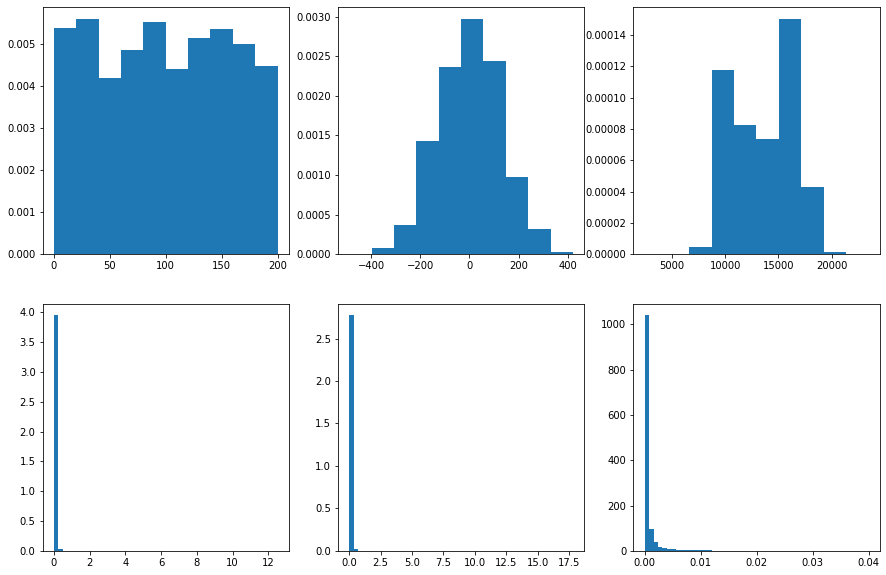

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(15,10))
ax = axes[0][0]
ax.hist(distance_all,density= True, bins =10);
ax = axes[0][1]
ax.hist(pec_val_all,density = True, bins =10);
ax = axes[0][2]
ax.hist(temp_all,density = True, bins =10);
ax = axes[1][0]
ax.hist(HI_density_all,density = True, bins =50);
ax = axes[1][1]
ax.hist(gas_density_all,density = True, bins =50);
ax = axes[1][2]
ax.hist(gas_metallicity_all,density = True, bins =50);

In [ ]:
def average_gamma(gamma):
    average = 0
    for i in (gamma):
        average += i
    average = average/(len(gamma))
    return average
average = average_gamma(gamma+gamma2)
average


1.3824014258081044e-17

In [ ]:
sigma = 6.3e-18
optical_depth = np.multiply(sigma,lyman_limited_value)

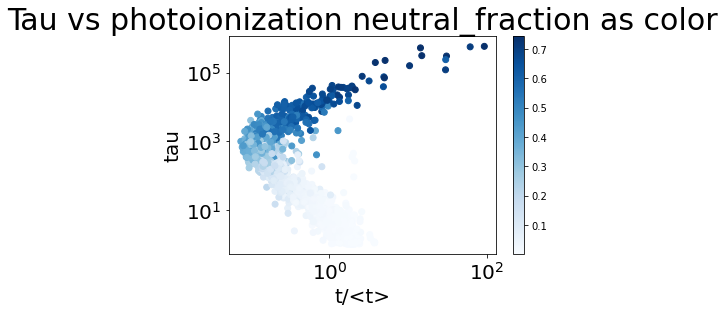

In [ ]:

plt.xlabel("t/<t>",fontsize =20)
plt.ylabel("tau",fontsize =20)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("Tau vs photoionization neutral_fraction as color",fontsize =30)
plt.scatter(gamma/average,optical_depth,c = neutral_fraction,cmap="Blues")
plt.colorbar()


In [ ]:
np.divide(HI_density_all[0],gas_density_all[0])

0.47981586402266285

In [ ]:
len(HI_density_all)

2507

In [ ]:
len(neutral_fraction)

2507

In [ ]:
HI_density_all

[0.01355,
 0.00268,
 4.084e-05,
 0.003444,
 3.875e-05,
 0.002091,
 0.0001821,
 0.00382,
 0.001236,
 1.943e-05,
 0.0003687,
 1.484e-05,
 1.719e-05,
 0.0006163,
 5.843e-05,
 0.0747,
 0.0003598,
 0.000386,
 0.0001691,
 0.007116,
 0.002767,
 9.994e-05,
 0.003038,
 0.0005463,
 0.000955,
 0.0009155,
 0.0008811,
 3.645e-05,
 0.01581,
 0.003318,
 9.95e-05,
 2.869,
 2.059e-05,
 0.01712,
 0.0001487,
 2.041e-05,
 0.002038,
 0.02444,
 3.997e-05,
 0.0001621,
 0.003205,
 0.001657,
 1.017e-05,
 0.002154,
 0.01886,
 1.838e-05,
 1.528e-05,
 1.46e-05,
 0.002344,
 2.393e-05,
 0.001625,
 0.00481,
 1.831e-05,
 1.328e-05,
 0.000144,
 0.007536,
 0.0003449,
 0.003153,
 2.04e-05,
 0.0007098,
 3.397e-05,
 0.03513,
 0.004563,
 0.02969,
 0.0002738,
 8.75e-06,
 0.0002819,
 0.006657,
 6.581e-05,
 1.292e-05,
 1.561e-05,
 4.029e-05,
 0.03147,
 3.577e-05,
 2.945e-05,
 1.929e-05,
 0.001861,
 0.002932,
 3.353e-05,
 0.0003197,
 0.007426,
 6.499e-05,
 0.007872,
 0.004466,
 0.0003028,
 3.997e-05,
 0.02447,
 1.695e-05,
 0.0

In [ ]:
gas_density_all

[0.02824,
 0.0154,
 0.006556,
 0.01735,
 0.005707,
 0.01338,
 0.008814,
 0.0137,
 0.01648,
 0.005508,
 0.009847,
 0.004447,
 0.004578,
 0.01004,
 0.007098,
 0.1171,
 0.008805,
 0.01439,
 0.007188,
 0.02015,
 0.0128,
 0.006926,
 0.01404,
 0.01279,
 0.01152,
 0.01031,
 0.01165,
 0.006259,
 0.03023,
 0.01958,
 0.007846,
 3.889,
 0.005212,
 0.04285,
 0.008186,
 0.00489,
 0.01288,
 0.04305,
 0.005667,
 0.008429,
 0.01766,
 0.01205,
 0.003722,
 0.0127,
 0.03599,
 0.004606,
 0.004218,
 0.00408,
 0.01444,
 0.00547,
 0.01215,
 0.01774,
 0.004611,
 0.003853,
 0.007633,
 0.02296,
 0.00896,
 0.0143,
 0.005225,
 0.01084,
 0.005545,
 0.06008,
 0.01367,
 0.05164,
 0.01016,
 0.003414,
 0.006876,
 0.02002,
 0.007362,
 0.004253,
 0.004228,
 0.007462,
 0.05459,
 0.006191,
 0.005625,
 0.004953,
 0.0138,
 0.01387,
 0.006189,
 0.009749,
 0.01962,
 0.006865,
 0.01845,
 0.0165,
 0.009103,
 0.006093,
 0.04351,
 0.004725,
 0.008545,
 0.004371,
 0.005896,
 0.01648,
 0.02837,
 0.005881,
 0.05787,
 0.07068,
 0.004

In [ ]:
neutral_fraction

[0.47981586402266285,
 0.17402597402597403,
 0.006229408175716901,
 0.1985014409221902,
 0.0067899071315927805,
 0.1562780269058296,
 0.020660313138189244,
 0.27883211678832115,
 0.07499999999999998,
 0.0035275962236746548,
 0.03744287600284351,
 0.0033370811783224644,
 0.0037549148099606817,
 0.06138446215139442,
 0.008231896308819386,
 0.6379163108454313,
 0.04086314593980693,
 0.026824183460736624,
 0.023525319977740676,
 0.35315136476426795,
 0.21617187499999999,
 0.014429685244008086,
 0.21638176638176637,
 0.0427130570758405,
 0.08289930555555555,
 0.0887972841901067,
 0.07563090128755365,
 0.005823613995845982,
 0.5229904068805823,
 0.16945863125638408,
 0.012681621208258985,
 0.7377217793777322,
 0.003950498848810438,
 0.39953325554259045,
 0.01816516002931835,
 0.004173824130879345,
 0.15822981366459626,
 0.5677119628339141,
 0.007053114522675136,
 0.019231225530905206,
 0.1814835787089468,
 0.1375103734439834,
 0.002732401934443847,
 0.16960629921259843,
 0.5240344540150041,


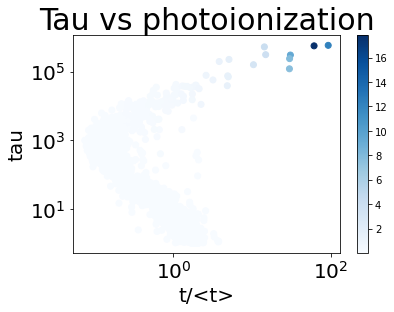

In [ ]:

plt.xlabel("t/<t>",fontsize =20)
plt.ylabel("tau",fontsize =20)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("Tau vs photoionization",fontsize =30)
plt.scatter(gamma/average,optical_depth,c=gas_density_all,cmap="Blues")
plt.colorbar()

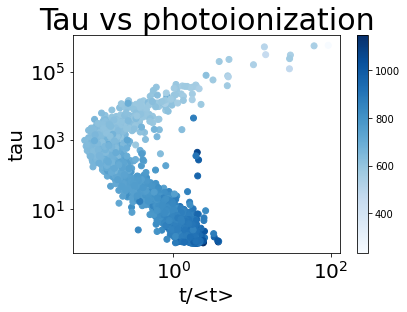

In [ ]:

plt.xlabel("t/<t>",fontsize =20)
plt.ylabel("tau",fontsize =20)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("Tau vs photoionization with temperature as color",fontsize =30)
plt.scatter(gamma/average,optical_depth,c=temp_all,cmap="Blues")
plt.colorbar()

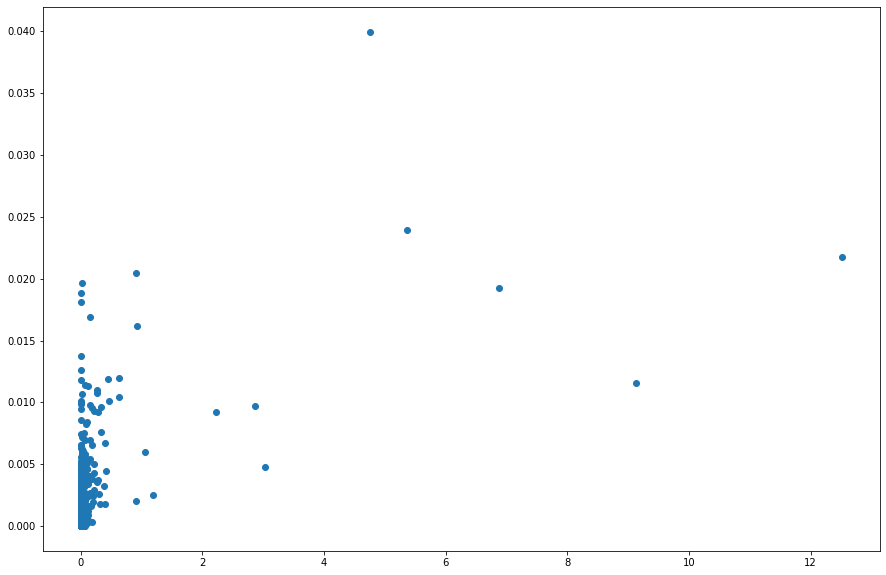

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(HI_density_all ,gas_metallicity_all)


Text(0.5, 1.0, 'gas_density vs HI_density with gas_metallicity as color')

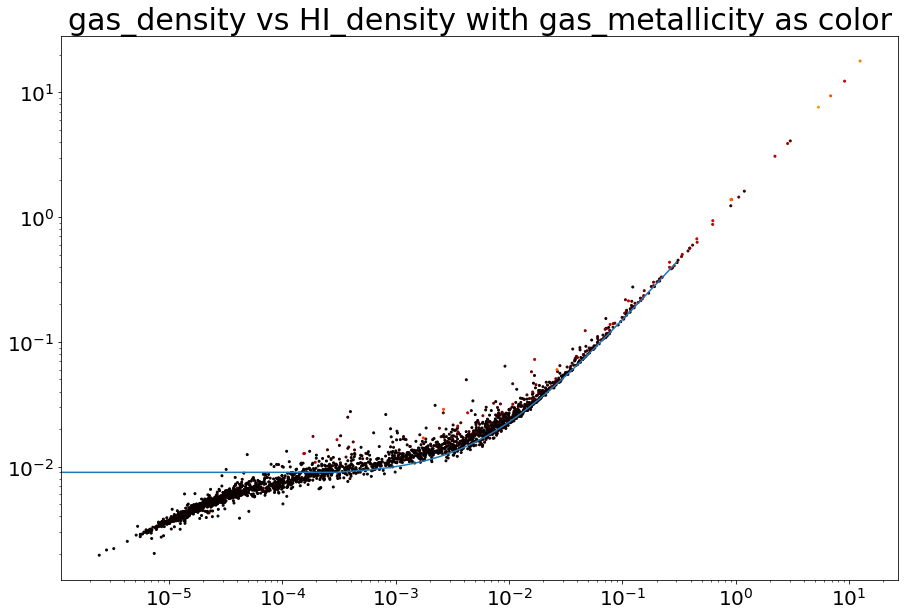

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(HI_density_all,gas_density_all,c = gas_metallicity_all,cmap="hot",s=4)
fit = np.polyfit(HI_density_all,gas_density_all,2)
x = np.linspace(0,0.3,1000)
ax.plot(x,np.polyval(fit,x))
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("gas_density vs HI_density with gas_metallicity as color",fontsize=30)

Text(0.5, 1.0, 'gas_density vs HI_density with gas_metallicity as color')

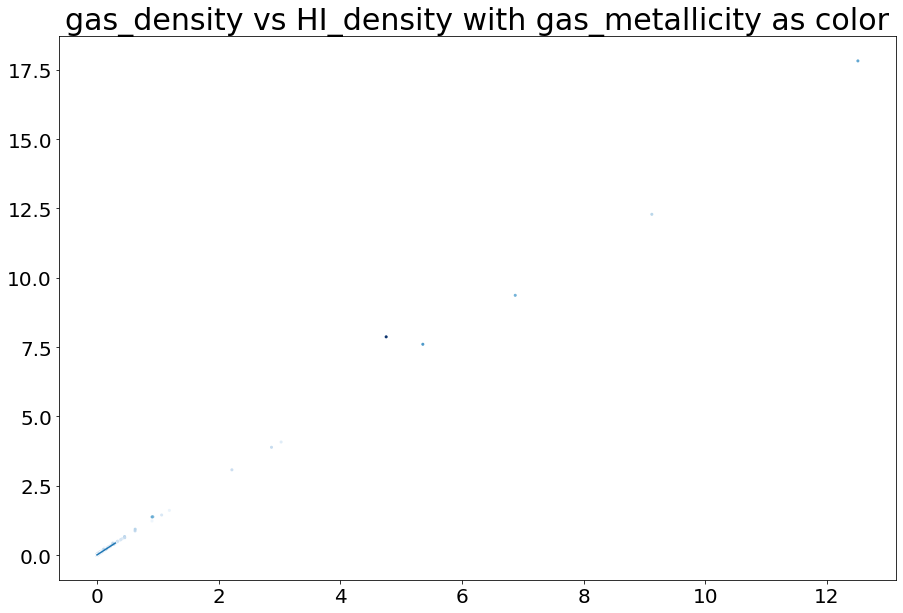

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
fit = np.polyfit(HI_density_all,gas_density_all,2)
ax.scatter(HI_density_all,gas_density_all,c = gas_metallicity_all,cmap="Blues",s=4)
x = np.linspace(0,0.3,1000)
ax.plot(x,np.polyval(fit,x))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("gas_density vs HI_density with gas_metallicity as color",fontsize=30)

Text(0.5, 1.0, 'gas_density vs HI_density with temperature as color')

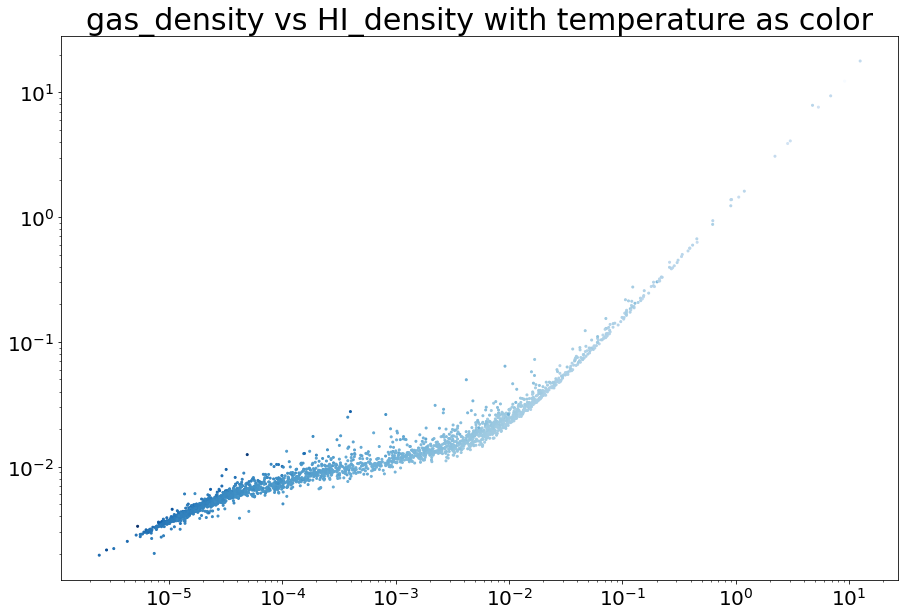

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(HI_density_all,gas_density_all,c = temp_all,cmap="Blues",s=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("gas_density vs HI_density with temperature as color",fontsize=30)

In [ ]:
def calculate_gamma(temperature,density,xHI,scale):
    '''Gamma = R(T)*ne/xHI, R(T) = 4.3e-13 * (T/1e4K)^{-0.7), ne = 0.82*nb.
    '''
    omega_b = 0.0479; h = 0.6814
    mean_nb = 1.123e-5/scale**3*omega_b*h**2
    nb = np.multiply(density ,mean_nb); ne = 0.82*nb
    R_T = 4.3e-13 * (np.divide(temperature,1e4))**(-0.7)
    gamma =R_T * ne/ xHI
    
    return gamma

In [ ]:
sigma = 6.3e-18
optical_depth = np.multiply(sigma,area)

NameError: name 'area' is not defined

In [ ]:
gamma_all = []
gamma_all = calculate_gamma(temp_all,gas_density_all,np.divide(HI_density_all,gas_density_all),0.1452)

In [ ]:
def average_gamma(gamma):
    average = 0
    for i in (gamma):
        average += i
    average = average/(len(gamma))
    return average
average = average_gamma(gamma_all)
average


2.5356165078324222e-17

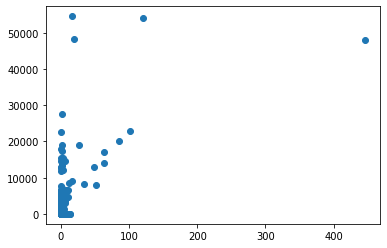

In [ ]:
plt.scatter(gamma_all/average,optical_depth)

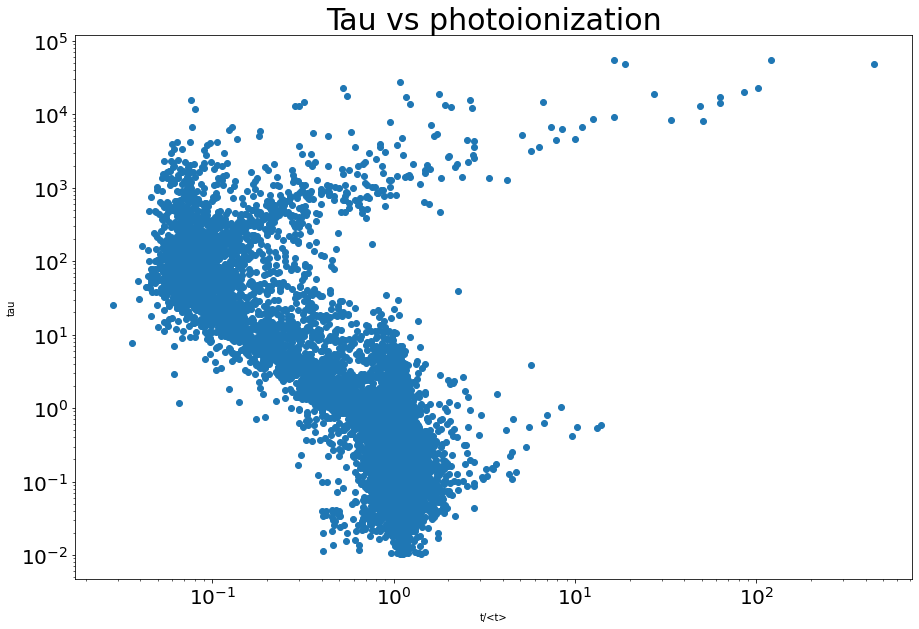

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("t/<t>")
ax.set_ylabel("tau")
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("Tau vs photoionization",fontsize =30)
ax.scatter(gamma_all/average,optical_depth)

Text(0.5, 1.0, 'gas_density vs HI_density with gamma as color')

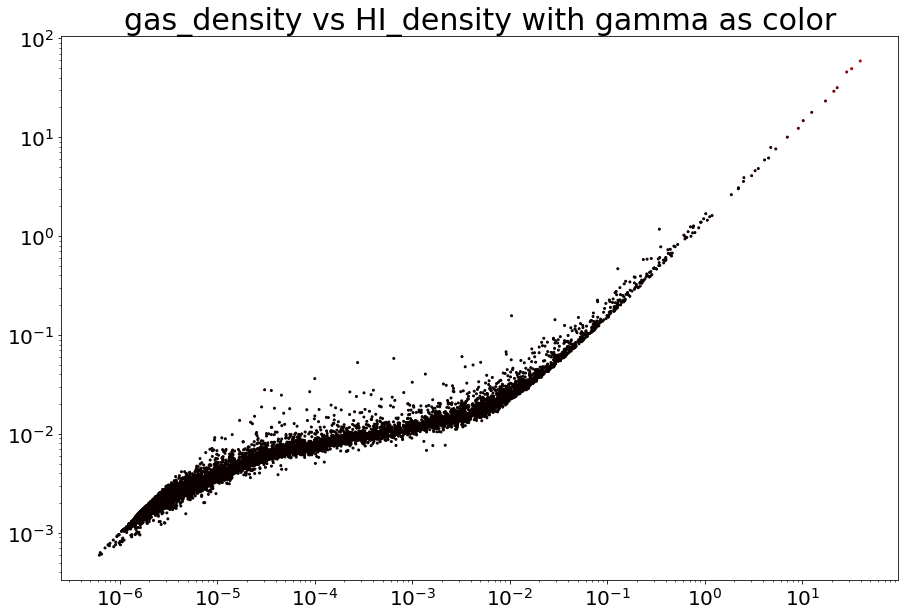

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(HI_density_all,gas_density_all,c = gamma_all,cmap="hot",s=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_title("gas_density vs HI_density with gamma as color",fontsize=30)

Text(0.5, 1.0, 'gas_density vs temperature')

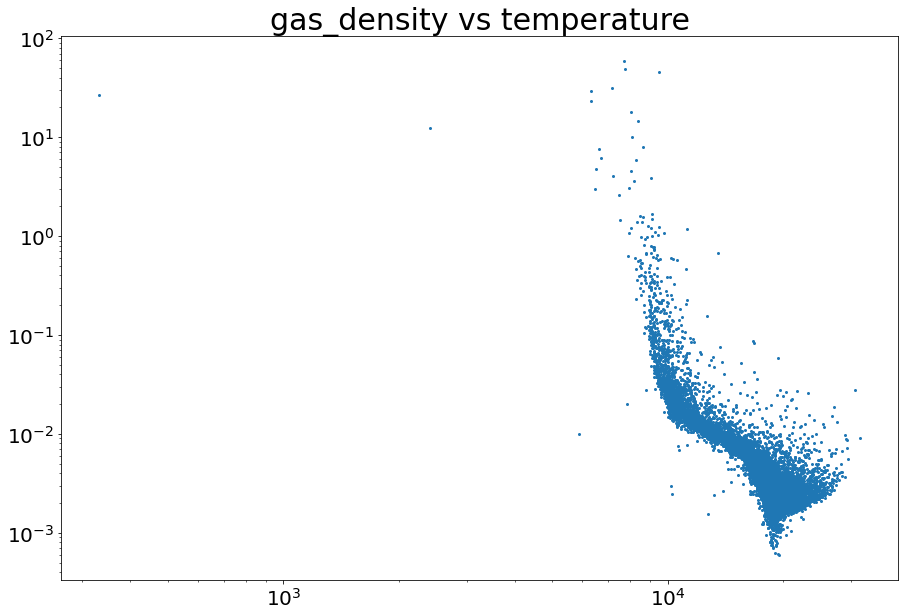

In [ ]:
#temperature density relation
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(temp_all,gas_density_all,cmap="hot",s=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("gas_density vs temperature",fontsize =30)

Text(0.5, 1.0, 'optical_depth vs gas_density')

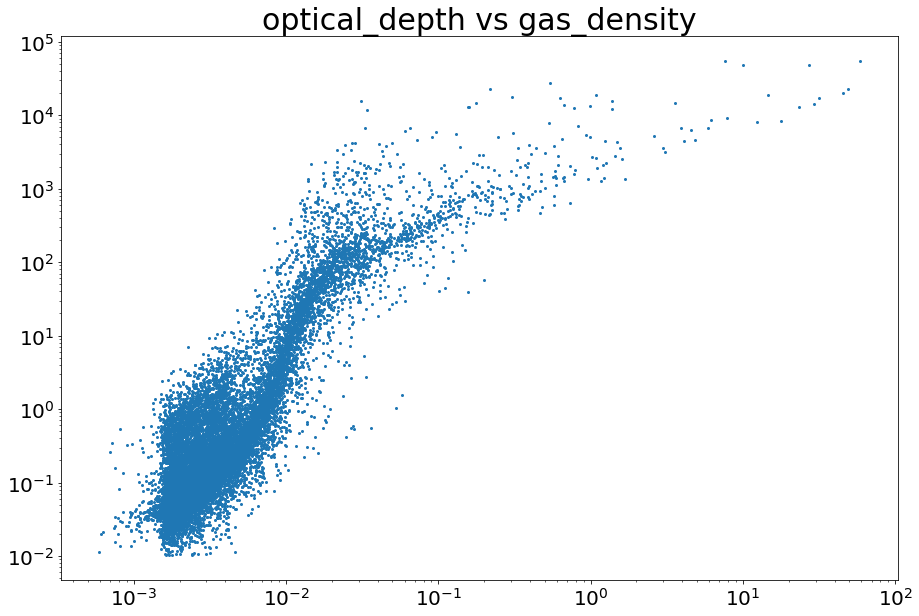

In [ ]:
#temperature density relation
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(gas_density_all,optical_depth,cmap="hot",s=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("optical_depth vs gas_density",fontsize =30)

In [ ]:
neutral_fraction = np.divide(HI_density_all,gas_density_all)

Text(0.5, 1.0, 'temperature vs neutral_fraction')

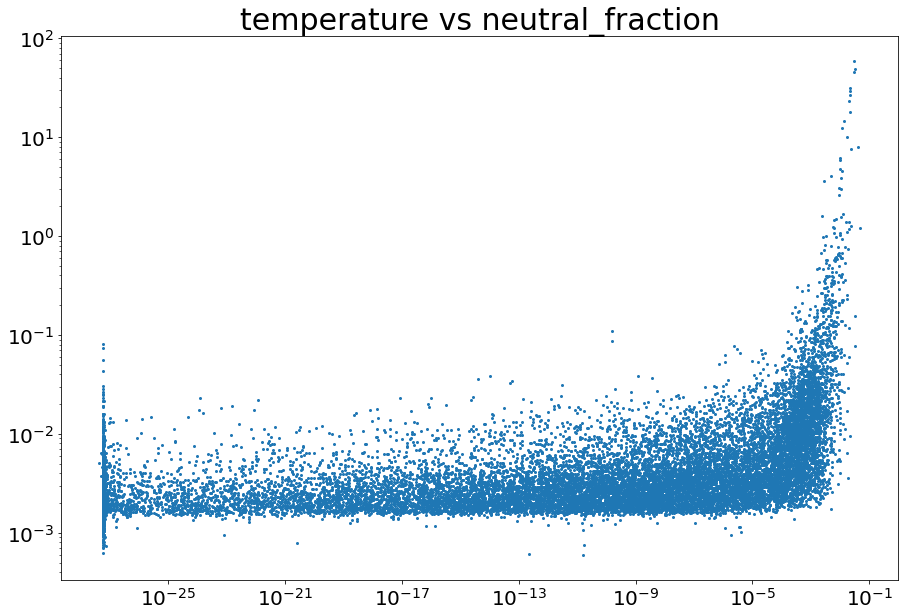

In [ ]:
#temperature density relation
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(gas_metallicity_all,gas_density_all,s=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("temperature vs neutral_fraction",fontsize =30)


Text(0.5, 1.0, 'gas_density vs neutral_fraction ')

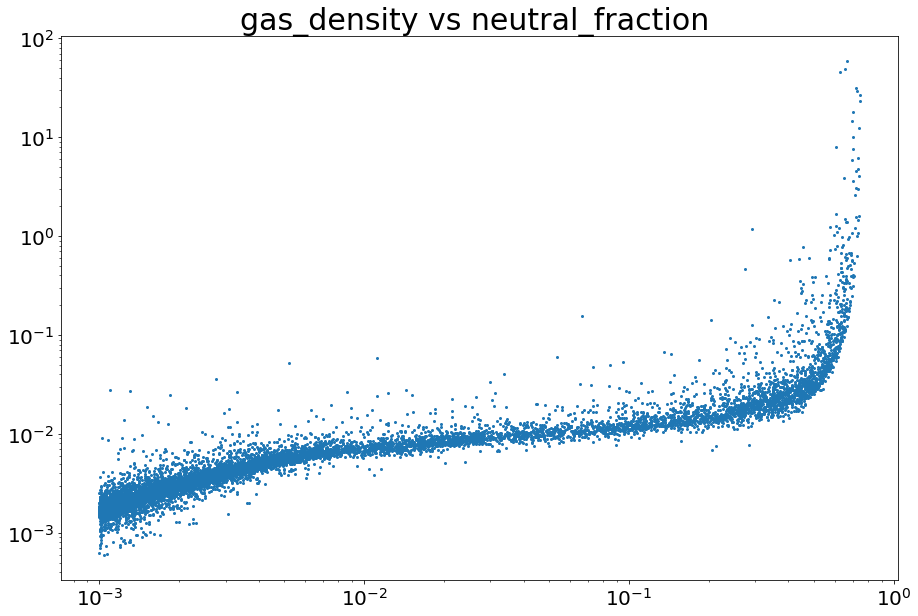

In [ ]:
#temperature density relation
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(neutral_fraction,gas_density_all,s=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title("gas_density vs neutral_fraction ",fontsize =30)


(0.0, 10.0)

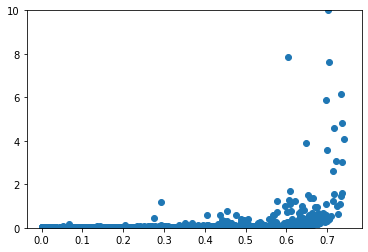

In [ ]:
plt.scatter(neutral_fraction,gas_density_all)
plt.ylim(0,10)